In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
wine = load_wine()
X = wine.data
y = wine.target

In [3]:
wine_df = pd.DataFrame(data=X, columns=wine.feature_names)
wine_df['target'] = y

In [4]:
print("Dataset preview:")
print(wine_df.head())

Dataset preview:
   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  tar

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [6]:
k_values = [1, 3, 5, 7, 9]

In [7]:
train_accuracies = []
test_accuracies = []

In [8]:
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    y_train_pred = knn.predict(X_train)
    y_test_pred = knn.predict(X_test)
    
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)
    
    print(f"\nResults for k={k}:")
    print("Training Accuracy:", train_accuracy)
    print("Test Accuracy:", test_accuracy)
    print("Classification Report:\n", classification_report(y_test, y_test_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))


Results for k=1:
Training Accuracy: 1.0
Test Accuracy: 0.7962962962962963
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.89      0.85        19
           1       0.84      0.76      0.80        21
           2       0.71      0.71      0.71        14

    accuracy                           0.80        54
   macro avg       0.79      0.79      0.79        54
weighted avg       0.80      0.80      0.80        54

Confusion Matrix:
 [[17  0  2]
 [ 3 16  2]
 [ 1  3 10]]

Results for k=3:
Training Accuracy: 0.8387096774193549
Test Accuracy: 0.7407407407407407
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.89      0.89        19
           1       0.75      0.71      0.73        21
           2       0.53      0.57      0.55        14

    accuracy                           0.74        54
   macro avg       0.73      0.73      0.73        54
weighted avg       0.74 

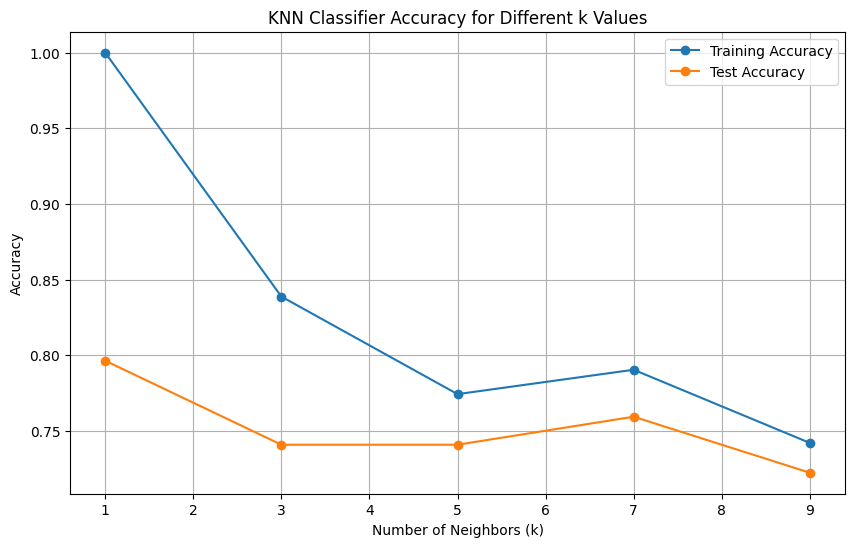

In [9]:
plt.figure(figsize=(10, 6))
plt.plot(k_values, train_accuracies, label='Training Accuracy', marker='o')
plt.plot(k_values, test_accuracies, label='Test Accuracy', marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('KNN Classifier Accuracy for Different k Values')
plt.legend()
plt.grid(True)
plt.show()